### Placement Assignment Machine Learning

#### Q-6. Imagine you have a dataset where you have predicted loan Eligibility using any 4 different classification algorithms. Now you have to build a model which can predict loan Eligibility and you need to find the accuracy of the model and built-in docker and use some library to display that in frontend

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
import re
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [32]:
data= pd.read_csv("train_loan.csv")
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [33]:
df = data.copy()

In [34]:
df.shape

(614, 13)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [36]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [37]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
df=df.dropna()

In [39]:
df.isnull().sum().sum()

0

In [40]:
df["Gender"].replace({'Male': 1, 'Female': 0}, inplace=True)
df["Married"].replace({'No': 0, 'Yes': 1}, inplace=True)
df["Dependents"].replace({'0': 0, '1': 1, '2': 2, '3+': 3}, inplace=True)
df["Education"].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)
df["Self_Employed"].replace({'No': 0, 'Yes': 1}, inplace=True)
df["Property_Area"].replace({'Rural': 0, 'Urban': 1, "Semiurban": 2}, inplace=True)
df["Loan_Status"].replace({'N': 0, 'Y': 1}, inplace=True)

In [41]:
df['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

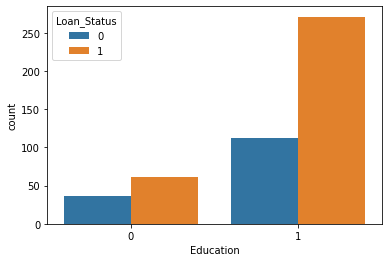

In [42]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

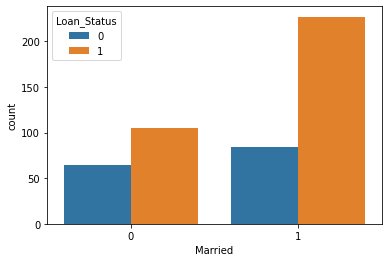

In [43]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [44]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=df[['Loan_Status']]

In [47]:
numerical_features = X.select_dtypes(exclude="object").columns

In [52]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_features)
])

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [53]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [54]:
def evaluate_model(true, predicted):
    accuracy_score1 = accuracy_score(true, predicted)
    return accuracy_score1

In [57]:
models={
    'LogisticRegression':LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'XGBClassifier':XGBClassifier()
}

trained_model_list=[]
model_list=[]
accuracy_score_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)
    #print(y_pred.shape)
    #print(y_test.shape)
    accuracy_score1=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print("Accuracy score",accuracy_score1)

    accuracy_score_list.append(accuracy_score1)
    
    print('='*35)
    print('\n')
    in_data=(1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0)
    in_data_array=np.asarray(in_data)
    
    #reshaping the data
    in_reshape=in_data_array.reshape(1,-1)
    prediction=model.predict(in_reshape)
    print(prediction)
    if(prediction==0):
        print(" Loan is not approved")
    else:
        print("Loan is approved")

LogisticRegression
Accuracy score 0.7569444444444444


[1]
Loan is approved
DecisionTreeClassifier
Accuracy score 0.6875


[1]
Loan is approved
RandomForestClassifier
Accuracy score 0.7777777777777778


[0]
 Loan is not approved
XGBClassifier
Accuracy score 0.75


[1]
Loan is approved


NameError: name 'classifier' is not defined